<a href="https://colab.research.google.com/github/esthernwagborogu/esthernwagborogu/blob/main/Groceries_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visulize

*   List item
*   List item


Total count of itemdescription sold by the year
Total count of itemdescription sold by the month
Total count of itemdescription sold by the seasons
Which item was sold more (Top 5)
Which item was sold less (Last 5)
Top 5 buyers
Last 5 buyers
Top 5 items shopped for each season
Least 5 items shopped for each season
Best performing items sold over the year

In [1]:
#!pip install pandas and numpy
import pandas as pd
import numpy as np
print(pd)

<module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>


In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv')
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


Change the date column to Datetime
Extract month and year from the date column
Create a column for seasons of the year

In [6]:
#we want to check the total number of missing values in each column of the dataset
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
#change the date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [8]:
# create the month and year column
df['Month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df.head(5)

,Member_number,Date,itemDescription,Month,year
0,1808,2015-07-21,tropical fruit,7,2015
1,2552,2015-01-05,whole milk,1,2015
2,2300,2015-09-19,pip fruit,9,2015
3,1187,2015-12-12,other vegetables,12,2015
4,3037,2015-02-01,whole milk,2,2015


In [9]:
#create a function for Season
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'


In [10]:
df['season'] = df['Date'].apply(get_season)
df.head()

,Member_number,Date,itemDescription,Month,year,season
0,1808,2015-07-21,tropical fruit,7,2015,Summer
1,2552,2015-01-05,whole milk,1,2015,Winter
2,2300,2015-09-19,pip fruit,9,2015,Autumn
3,1187,2015-12-12,other vegetables,12,2015,Winter
4,3037,2015-02-01,whole milk,2,2015,Winter


In [11]:
##Total count of itemdescription sold by the year
year_count = df.groupby('year')['itemDescription'].size().reset_index(name='count').set_index('year')
year_count.head()

,count
year,
2014,16530
2015,20350


<Figure size 1000x600 with 0 Axes>

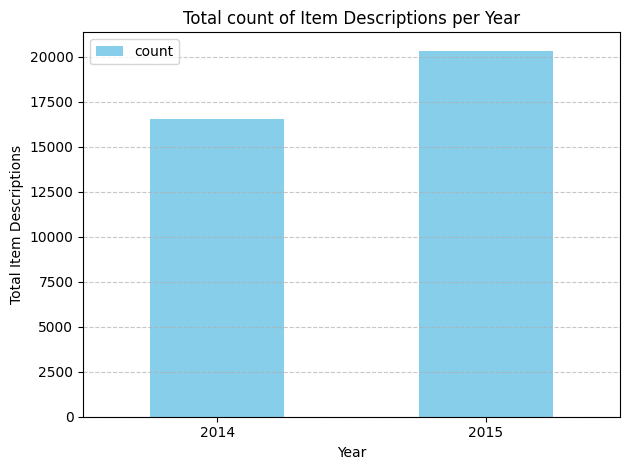

In [12]:
plt.figure(figsize=(10, 6))
year_count.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Item Descriptions')
plt.title('Total count of Item Descriptions per Year')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
##item count of itemdescription sold by the year
item_count = df.groupby('year')['itemDescription'].value_counts().reset_index(name='Count')
item_count.head()

,year,itemDescription,Count
0,2014,whole milk,1008
1,2014,other vegetables,852
2,2014,rolls/buns,776
3,2014,soda,714
4,2014,yogurt,593


In [14]:
#item count of year 2014
item_count[item_count['year'] == 2014].head(20)

,year,itemDescription,Count
0,2014,whole milk,1008
1,2014,other vegetables,852
2,2014,rolls/buns,776
3,2014,soda,714
4,2014,yogurt,593
5,2014,root vegetables,478
6,2014,bottled water,438
7,2014,tropical fruit,363
8,2014,pastry,362
9,2014,shopping bags,361


In [15]:
#item count of year 2015
item_count[item_count['year'] == 2015].head(20)

,year,itemDescription,Count
165,2015,whole milk,1460
166,2015,other vegetables,1038
167,2015,rolls/buns,874
168,2015,sausage,744
169,2015,soda,729
170,2015,yogurt,689
171,2015,tropical fruit,668
172,2015,root vegetables,591
173,2015,citrus fruit,544
174,2015,frankfurter,505


In [16]:
##Total count of itemdescription sold by the month

month_count = df.groupby('Month')['itemDescription'].count().reset_index(name='Count').set_index('Month')
month_count.head()

,Count
Month,
1,3159
2,2850
3,2984
4,3071
5,3231


<Figure size 1000x600 with 0 Axes>

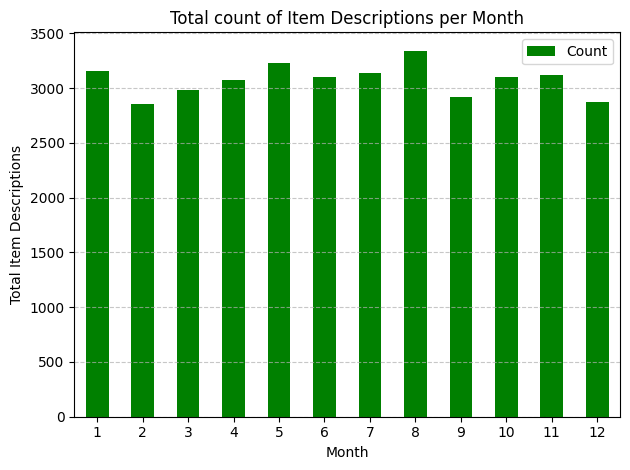

In [17]:
#plot Graph
plt.figure(figsize=(10, 6))
month_count.plot(kind='bar', color='g')
plt.xlabel('Month')
plt.ylabel('Total Item Descriptions')
plt.title('Total count of Item Descriptions per Month')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
sub_group1 = df[df['year']==2014]
sub_group1.head()

,Member_number,Date,itemDescription,Month,year,season
8696,1664,2014-10-01,rolls/buns,10,2014,Autumn
8697,3942,2014-12-16,hamburger meat,12,2014,Winter
8698,2638,2014-10-10,turkey,10,2014,Autumn
8699,4735,2014-10-10,specialty chocolate,10,2014,Autumn
8700,3745,2014-12-09,frankfurter,12,2014,Winter


In [19]:
sub_group1['Month'].unique()

array([10, 12, 11,  8,  6,  5,  2,  4,  7,  1,  3,  9], dtype=int32)

In [20]:
sub_group2 = df[df['year']==2015]
sub_group2.head()

,Member_number,Date,itemDescription,Month,year,season
0,1808,2015-07-21,tropical fruit,7,2015,Summer
1,2552,2015-01-05,whole milk,1,2015,Winter
2,2300,2015-09-19,pip fruit,9,2015,Autumn
3,1187,2015-12-12,other vegetables,12,2015,Winter
4,3037,2015-02-01,whole milk,2,2015,Winter


In [21]:
Month1 =sub_group1.groupby('Month')['itemDescription'].count().reset_index(name='Count').set_index('Month')
Month1.head()

,Count
Month,
1,1377
2,1302
3,1272
4,1389
5,1450


<Figure size 1000x600 with 0 Axes>

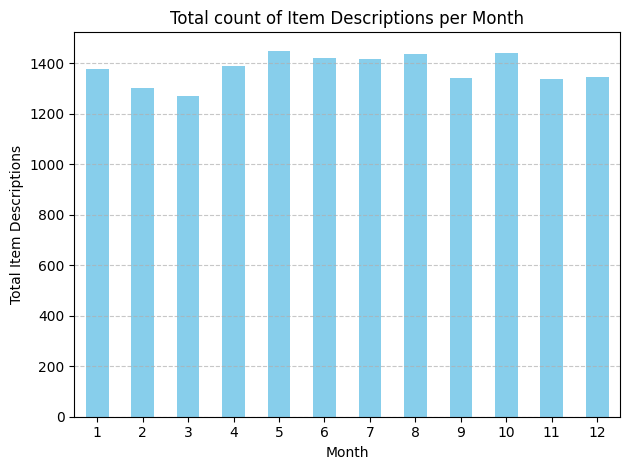

In [22]:
plt.figure(figsize=(10, 6))
Month1.plot(kind='bar', color='skyblue', legend=None)
plt.xlabel('Month')
plt.ylabel('Total Item Descriptions')
plt.title('Total count of Item Descriptions per Month')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
Month2 = sub_group2.groupby('Month')['itemDescription'].count().reset_index(name='Count').set_index('Month')
Month2.head()

,Count
Month,
1,1782
2,1548
3,1712
4,1682
5,1781


<Figure size 1000x600 with 0 Axes>

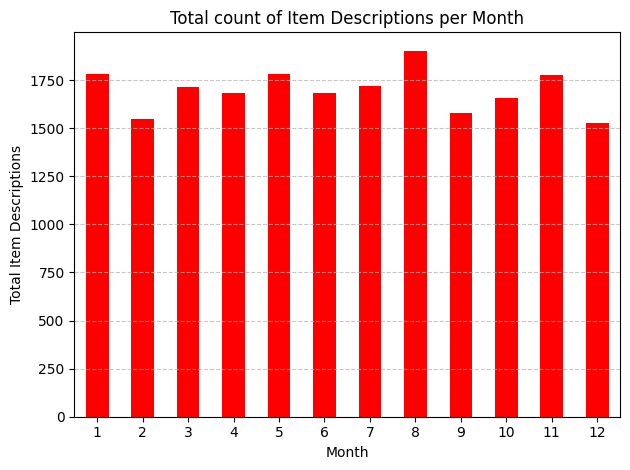

In [24]:
plt.figure(figsize=(10, 6))
Month2.plot(kind='bar', color='r', legend=None)
plt.xlabel('Month')
plt.ylabel('Total Item Descriptions')
plt.title('Total count of Item Descriptions per Month')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

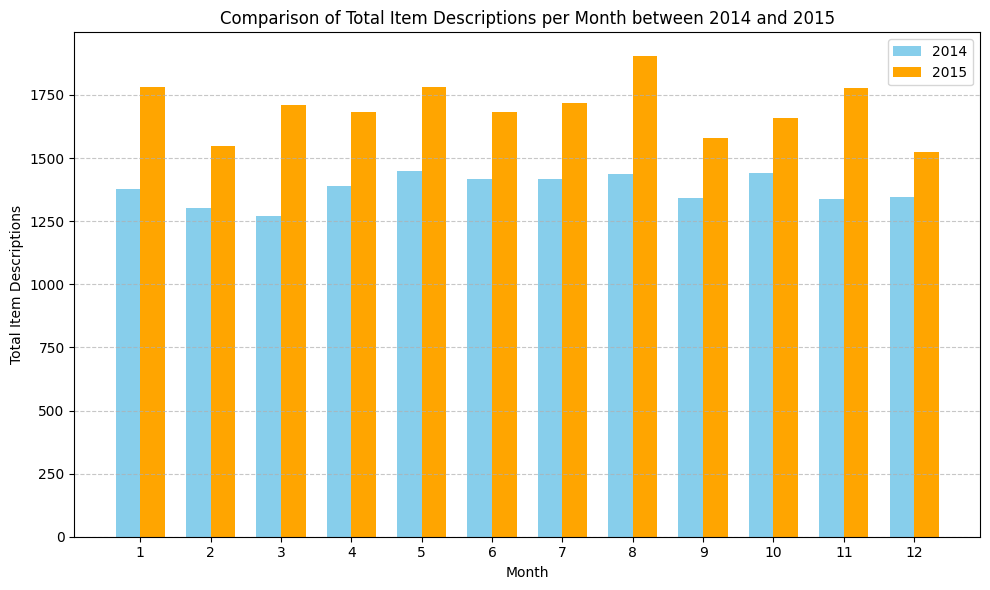

In [25]:
# Assuming 'try1' and 'try2' are DataFrames with 'Month' as the index and 'Count' as the column containing the total counts
# Get the months as the index
months = Month1.index

# Width of each bar
bar_width = 0.35

# Create a new figure and subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for A
ax.bar(np.arange(len(months)), Month1['Count'], width=bar_width, color='skyblue', label='2014')

# Plot for B, position it beside A
ax.bar(np.arange(len(months)) + bar_width, Month2['Count'], width=bar_width, color='orange', label='2015')

# Set labels, title, etc.
ax.set_xlabel('Month')
ax.set_ylabel('Total Item Descriptions')
ax.set_title('Comparison of Total Item Descriptions per Month between 2014 and 2015')
ax.set_xticks(np.arange(len(months)) + bar_width / 2)  # Set x-ticks at the center of each group
ax.set_xticklabels(months)  # Set x-tick labels as months
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()


In [26]:
#Total count of itemdescription sold by the seasons

season_count = df.groupby('season')['itemDescription'].count().reset_index(name='Count').set_index('season')
season_count.head()

,Count
season,
Autumn,9136
Spring,9286
Summer,9578
Winter,8880


<Figure size 1000x600 with 0 Axes>

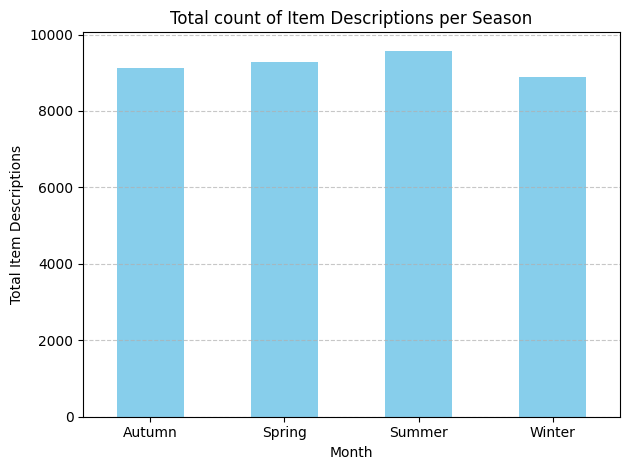

In [27]:
plt.figure(figsize=(10, 6))
season_count.plot(kind='bar', color='skyblue', legend=None)
plt.xlabel('Month')
plt.ylabel('Total Item Descriptions')
plt.title('Total count of Item Descriptions per Season')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
try11 = sub_group1.groupby('season')['itemDescription'].count().reset_index(name='Count').set_index('season')
try11.head()

,Count
season,
Autumn,4120
Spring,4111
Summer,4274
Winter,4025


In [29]:
try22 = sub_group2.groupby('season')['itemDescription'].count().reset_index(name='Count').set_index('season')
try22.head()

,Count
season,
Autumn,5016
Spring,5175
Summer,5304
Winter,4855


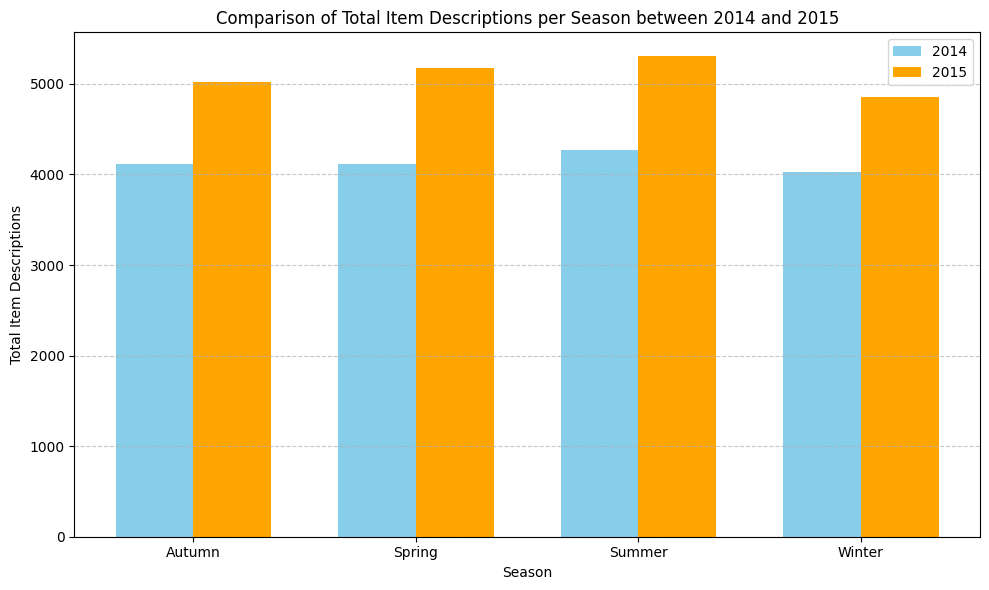

In [30]:


# Assuming 'try1' and 'try2' are DataFrames with 'Month' as the index and 'Count' as the column containing the total counts
# Get the months as the index
season = try11.index

# Width of each bar
bar_width = 0.35

# Create a new figure and subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for A
ax.bar(np.arange(len(season)), try11['Count'], width=bar_width, color='skyblue', label='2014')

# Plot for B, position it beside A
ax.bar(np.arange(len(season)) + bar_width, try22['Count'], width=bar_width, color='orange', label='2015')

# Set labels, title, etc.
ax.set_xlabel('Season')
ax.set_ylabel('Total Item Descriptions')
ax.set_title('Comparison of Total Item Descriptions per Season between 2014 and 2015')
ax.set_xticks(np.arange(len(season)) + bar_width / 2)  # Set x-ticks at the center of each group
ax.set_xticklabels(season)  # Set x-tick labels as months
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()


In [31]:
df[df['season']=='Summer'].groupby('season')['itemDescription'].value_counts().head()

season  itemDescription 
Summer  whole milk          634
        other vegetables    504
        rolls/buns          400
        soda                366
        yogurt              340
Name: count, dtype: int64

In [32]:
df[df['season']=='Winter'].groupby('season')['itemDescription'].value_counts().head()

season  itemDescription 
Winter  whole milk          562
        other vegetables    463
        rolls/buns          394
        soda                346
        yogurt              300
Name: count, dtype: int64

In [38]:
spring = df[df['season']=='Spring'].groupby('season')['itemDescription'].value_counts().head()
print(spring)

season  itemDescription 
Spring  whole milk          643
        other vegetables    448
        rolls/buns          412
        soda                367
        yogurt              325
Name: count, dtype: int64


In [34]:
Autumn = df[df['season']=='Autumn'].groupby('season')['itemDescription'].value_counts().head()
print(Autumn)

season  itemDescription 
Autumn  whole milk          629
        other vegetables    475
        rolls/buns          444
        soda                364
        yogurt              317
Name: count, dtype: int64


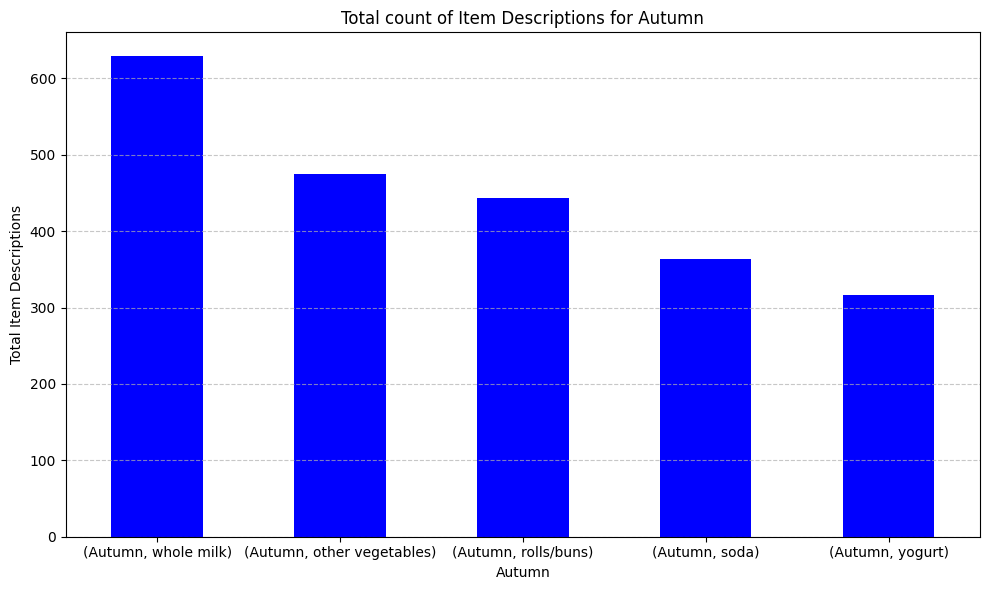

In [35]:
plt.figure(figsize=(10, 6))
Autumn.plot(kind='bar', color='blue', legend=None)
plt.xlabel('Autumn')
plt.ylabel('Total Item Descriptions')
plt.title('Total count of Item Descriptions for Autumn')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

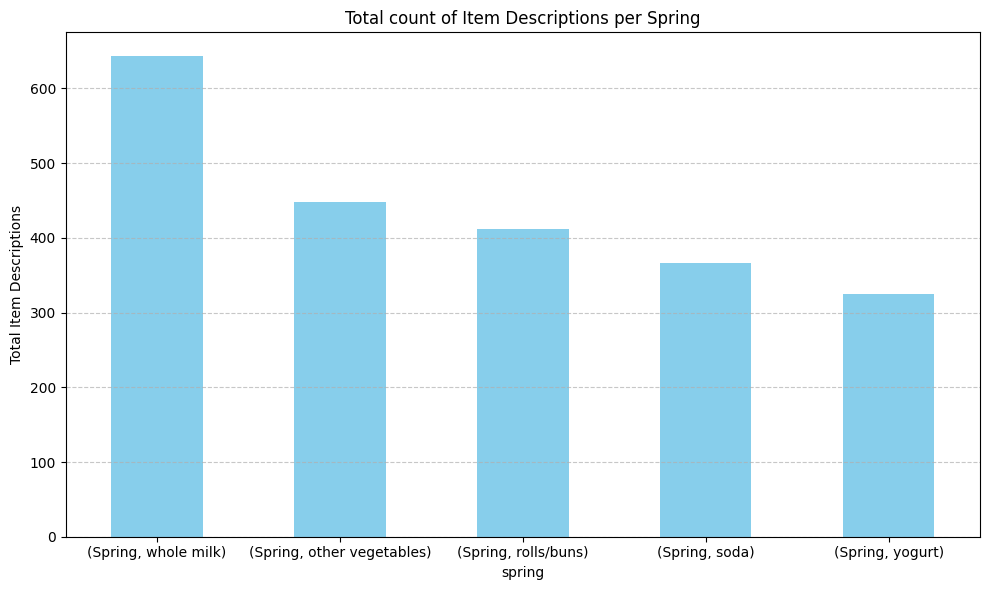

In [39]:
plt.figure(figsize=(10, 6))
spring.plot(kind='bar', color='skyblue', legend=None)
plt.xlabel('spring')
plt.ylabel('Total Item Descriptions')
plt.title('Total count of Item Descriptions per Spring')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
df.head()

,Member_number,Date,itemDescription,Month,year,season
0,1808,2015-07-21,tropical fruit,7,2015,Summer
1,2552,2015-01-05,whole milk,1,2015,Winter
2,2300,2015-09-19,pip fruit,9,2015,Autumn
3,1187,2015-12-12,other vegetables,12,2015,Winter
4,3037,2015-02-01,whole milk,2,2015,Winter


In [41]:
# Filter the DataFrame for the Spring season
spring_items = df[df['season'] == 'Spring']

# Count the occurrence of each item in the Spring season
item_counts = spring_items['itemDescription'].value_counts()

# Get the 5 items with the least counts
least_sold_items = item_counts.nsmallest(5)

# Display the result
print("Least 5 items sold in Spring:")
print(least_sold_items)

Least 5 items sold in Spring:
itemDescription
frozen chicken            1
hair spray                1
bathroom cleaner          1
flower soil/fertilizer    1
preservation products     1
Name: count, dtype: int64


In [43]:
Autumn_items = df[df['season'] == 'Autumn']

# Count the occurrence of each item in the Spring season
item_counts = Autumn_items['itemDescription'].value_counts()

# Get the 5 items with the least counts
least_sold_items = item_counts.nsmallest(5)

# Display the result
print("Least 5 items sold in Autumn:")
print(least_sold_items)

Least 5 items sold in Autumn:
itemDescription
cocoa drinks        1
rubbing alcohol     1
salad dressing      1
organic products    1
cookware            1
Name: count, dtype: int64


In [44]:
Winter_items = df[df['season'] == 'Winter']

# Count the occurrence of each item in the Spring season
item_counts = Winter_items['itemDescription'].value_counts()

# Get the 5 items with the least counts
least_sold_items = item_counts.nsmallest(5)

# Display the result
print("Least 5 items sold in Autumn:")
print(least_sold_items)

Least 5 items sold in Autumn:
itemDescription
toilet cleaner     1
liqueur            1
make up remover    1
decalcifier        1
salad dressing     1
Name: count, dtype: int64


In [45]:
Summer_items = df[df['season'] == 'Summer']

# Count the occurrence of each item in the Spring season
item_counts = Summer_items['itemDescription'].value_counts()

# Get the 5 items with the least counts
least_sold_items = item_counts.nsmallest(5)

# Display the result
print("Least 5 items sold in Autumn:")
print(least_sold_items)

Least 5 items sold in Autumn:
itemDescription
salad dressing     1
kitchen utensil    1
whisky             1
toilet cleaner     1
make up remover    1
Name: count, dtype: int64


In [46]:
best_sellers = df.groupby('itemDescription')['year'].sum().sort_values(ascending=False)
best_sellers.head(5)

itemDescription
whole milk          4972012
other vegetables    3807498
rolls/buns          3323974
soda                2906931
yogurt              2582637
Name: year, dtype: int32

In [52]:
#top 5 member
top5= df.groupby('Member_number')['itemDescription'].count().reset_index(name='Count').set_index('Member_number').sort_values(by= 'Count', ascending=False).head(5)

In [56]:
#least 5
last5= df.groupby('Member_number')['itemDescription'].count().reset_index(name='Count').set_index('Member_number').sort_values(by= 'Count', ascending=False).tail(5)
last5.head(5)

,Count
Member_number,
3080,1
3991,1
1552,1
4824,1
3777,1
